In [ ]:
#import all necessary libraries
import numpy as np
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#define file path
file_path = "/content/drive/MyDrive/Colab Notebooks/DAIM_T2/DM/mhs.csv"
mhs_df = pd.read_csv(file_path)


In [ ]:
mhs_df #check dataframe

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
mhs_df.shape #check dataframe shape

(1014, 7)

In [ ]:
mhs_df.count() 

Age            1014
SystolicBP     1014
DiastolicBP    1014
BS             1014
BodyTemp       1014
HeartRate      1014
RiskLevel      1014
dtype: int64

In [ ]:
mhs_df.info() #check the dataset information and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


###### Data is free on missing values and there is a need to check for outliers

In [ ]:
mhs_df.describe().transpose().round(1) #descriptive analysis of the numerical variables

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.9,13.5,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.2,18.4,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.5,13.9,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.7,3.3,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.7,1.4,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.3,8.1,7.0,70.0,76.0,80.0,90.0


### Check for outliers

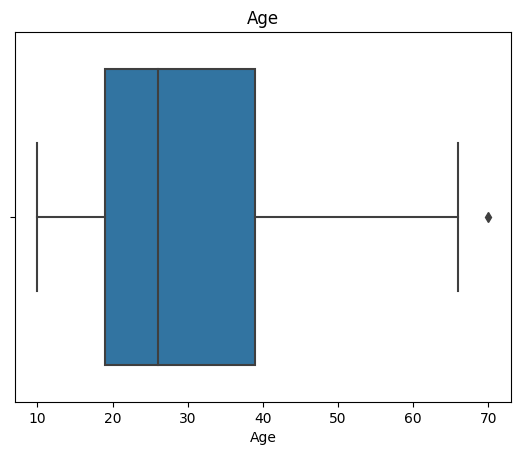

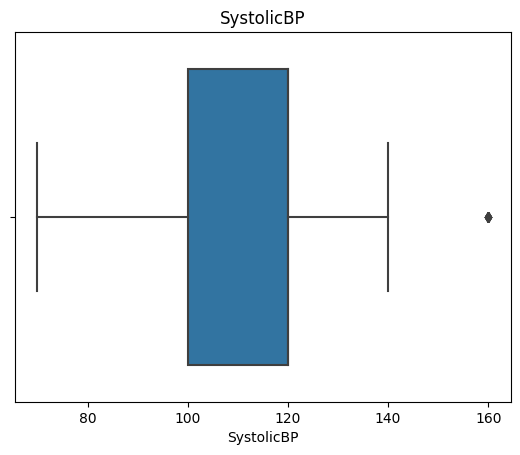

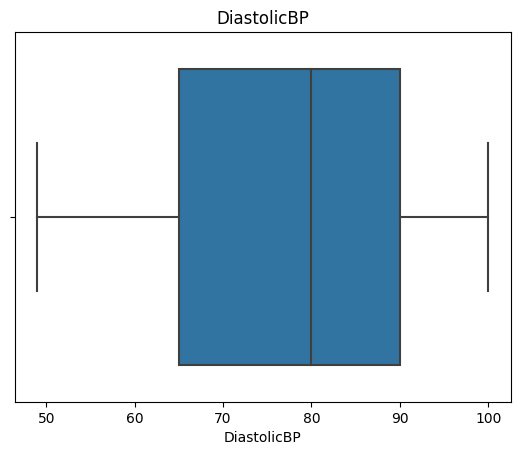

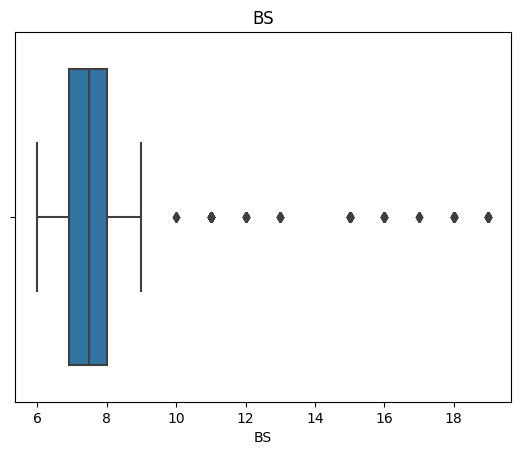

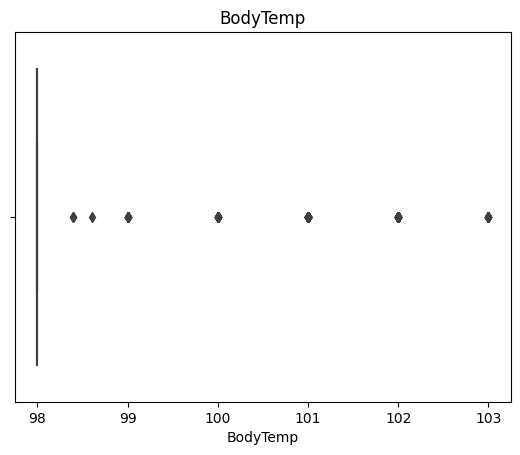

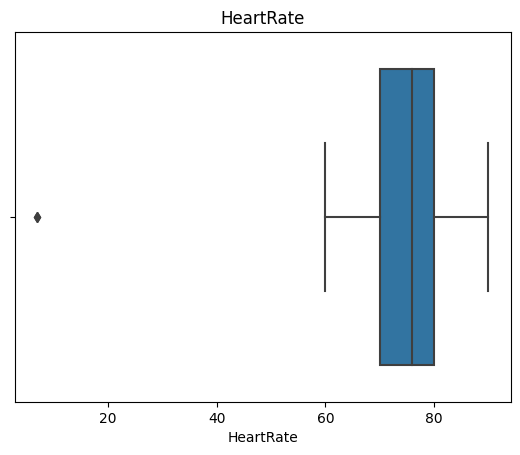

In [ ]:
# create a list of numerical column names (excluding 'risk_level')
numerical_cols = mhs_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
#numerical_cols.remove('RiskLevel')

# create boxplots for each numerical column
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=mhs_df[col])
    plt.title(col)


#### Task 1 - Linear Regression Model

##### Building the correlation matrix

In [ ]:
mhs_df.corr() #correlation of the data in the dataframe

<ipython-input-10-8a7ad136b70a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mhs_df.corr() #correlation of the data in the dataframe


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


<ipython-input-11-fa25a3e259ba>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mhs_df.corr(), cmap='flare', annot=True)


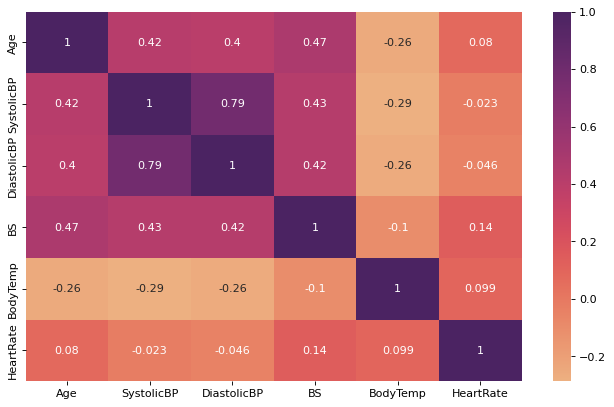

In [ ]:
#heatmap graph showing the correlation
plt.figure(figsize=(10,6), dpi=80)
sns.heatmap(mhs_df.corr(), cmap='flare', annot=True)
plt.show()

Diastolic (0.79), Age(0.42), BS(0.43) have a correlation with SystolicBP. They will be used for the linear regression

##### Building the models

In [ ]:
#Extract the independent and dependent variables (X and Y)

X = mhs_df.drop(['SystolicBP', 'RiskLevel'], axis=1) #drop systolicbp and risklevel

# Use systolic BP as the target variable
y = mhs_df['SystolicBP']

mhs_df.head(2)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk


In [ ]:
# Load the data and select the features
X1 = mhs_df[['Age']]
X2 = mhs_df[['Age', 'BS']]
X3 = mhs_df[['Age', 'DiastolicBP']]
X4 = mhs_df[['Age', 'DiastolicBP', 'BS']]
X5 = mhs_df[['DiastolicBP']]
X6 = mhs_df[['DiastolicBP', 'BS']]
X7 = mhs_df[['BS']]

#Model features
models = [('Model 1 (Age)', X1), ('Model 2 (Age, BS)', X2), ('Model 3 (Age, DiastolicBP)', X3),
          ('Model 4 (Age, DiastolicBP, BS)', X4), ('Model 5 (DiastolicBP)', X5),
          ('Model 6 (DiastolicBP, BS)', X6), ('Model 7 (BS)', X7)]

#fit the models
for name, X in models:
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    coef_labels = ['Intercept'] + [f'{col} Coefficient' for col in X.columns]
    coef_values = [model.intercept_] + model.coef_.tolist()
#print evaluation matrix
    print(f'{name}:')
    print(f'R-squared: {r_squared:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print("Coefficients:")
    for label, value in zip(coef_labels, coef_values):
        print(f'{label}: {value}')
    print()


Model 1 (Age):
R-squared: 0.17
MSE: 279.80
RMSE: 16.73
Coefficients:
Intercept: 96.22347865566913
Age Coefficient: 0.5682533061456423

Model 2 (Age, BS):
R-squared: 0.24
MSE: 257.08
RMSE: 16.03
Coefficients:
Intercept: 87.56071069185982
Age Coefficient: 0.3781027106125269
BS Coefficient: 1.6437004632607604

Model 3 (Age, DiastolicBP):
R-squared: 0.63
MSE: 124.54
RMSE: 11.16
Coefficients:
Intercept: 33.38698535159773
Age Coefficient: 0.1668342902137531
DiastolicBP Coefficient: 0.9786432034012889

Model 4 (Age, DiastolicBP, BS):
R-squared: 0.64
MSE: 123.13
RMSE: 11.10
Coefficients:
Intercept: 32.95467752831195
Age Coefficient: 0.12895517609026982
DiastolicBP Coefficient: 0.950230724871028
BS Coefficient: 0.4281761015061627

Model 5 (DiastolicBP):
R-squared: 0.62
MSE: 128.79
RMSE: 11.35
Coefficients:
Intercept: 33.44373692105704
DiastolicBP Coefficient: 1.0430801971088748

Model 6 (DiastolicBP, BS):
R-squared: 0.63
MSE: 125.33
RMSE: 11.20
Coefficients:
Intercept: 32.79487821075709
Diastol

<ipython-input-14-1456a5fa8731>:35: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


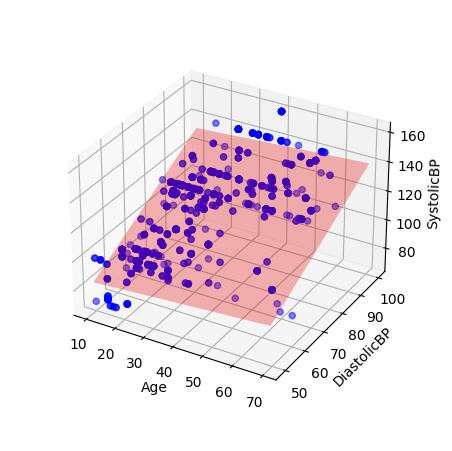

In [ ]:
#visualize model4 - the best performing model

from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# load the data
X4 = mhs_df[['Age', 'DiastolicBP', 'BS']]
y = mhs_df['SystolicBP']

# Fit the linear model
model4 = LinearRegression().fit(X4, y)

# Create a meshgrid for the 3D plot
x_surf, y_surf = np.meshgrid(np.linspace(X4['Age'].min(), X4['Age'].max(), 100), 
                             np.linspace(X4['DiastolicBP'].min(), X4['DiastolicBP'].max(), 100))
z_surf = np.array([model4.intercept_ + model4.coef_[0] * x + model4.coef_[1] * y + model4.coef_[2] * X4['BS'].mean() 
                   for x, y in zip(np.ravel(x_surf), np.ravel(y_surf))])
z_surf = z_surf.reshape(x_surf.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X4['Age'], X4['DiastolicBP'], y, c='blue', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)
ax.set_xlabel('Age')
ax.set_ylabel('DiastolicBP')
ax.set_zlabel('SystolicBP')
#ax.set_title('Linear Regression Plane for Model 4')

# Adjust plot margins to avoid z-label cut off

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# Increase the distance of the 3D plot's viewpoint
ax.dist = 12

plt.show()


#### Task 2 - Applying PCA and running Predictions

PCA Model All Variables:
Explained Variance Ratio: [0.37300454 0.20233409 0.14882391 0.11044591 0.09559082 0.06980073]
R-squared:  0.6288770992824888
Mean Squared Error:  120.09219700356535
Root Mean Squared Error:  10.958658540330807
Mean Absolute Error:  8.842660124921265


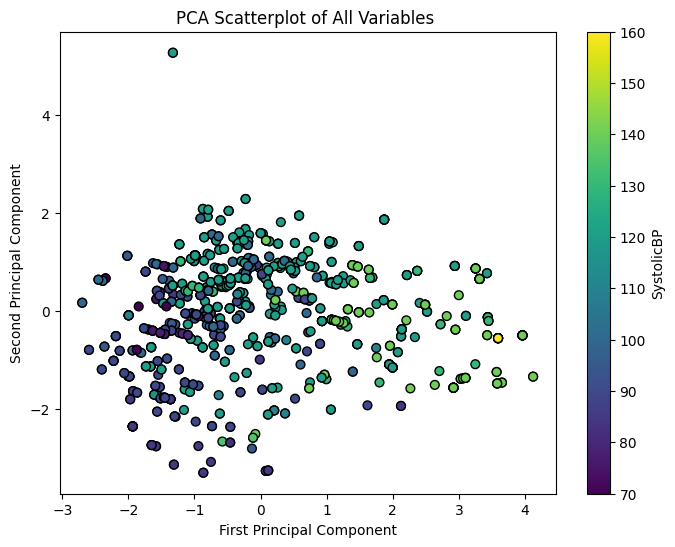

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Convert 'RiskLevel' to numerical
mhs_df['RiskLevel'] = LabelEncoder().fit_transform(mhs_df['RiskLevel'])

X = mhs_df.drop(['SystolicBP'], axis=1)
y = mhs_df['SystolicBP']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with n_components = 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit linear regression model on training data
model_pca = LinearRegression()
model_pca.fit(X_train, y_train)

# Make predictions on test data after PCA transformation
y_pred_pca = model_pca.predict(X_test)

# Calculate evaluation metrics for PCA model
r2_pca = r2_score(y_test, y_pred_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
rmse_pca = np.sqrt(mse_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)

print('PCA Model All Variables:')
print('Explained Variance Ratio:', pca.explained_variance_ratio_)
print('R-squared: ', r2_pca)
print('Mean Squared Error: ', mse_pca)
print('Root Mean Squared Error: ', rmse_pca)
print('Mean Absolute Error: ', mae_pca)


# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatterplot of All Variables ')
plt.colorbar(label='SystolicBP')
plt.show()


PCA Model Age and DiastolicBP:
Explained Variance Ratio: [0.69901314 0.30098686]
R-squared:  0.6111994472651758
Mean Squared Error:  125.81253402539618
Root Mean Squared Error:  11.216618653827728
Mean Absolute Error:  8.978062337651371


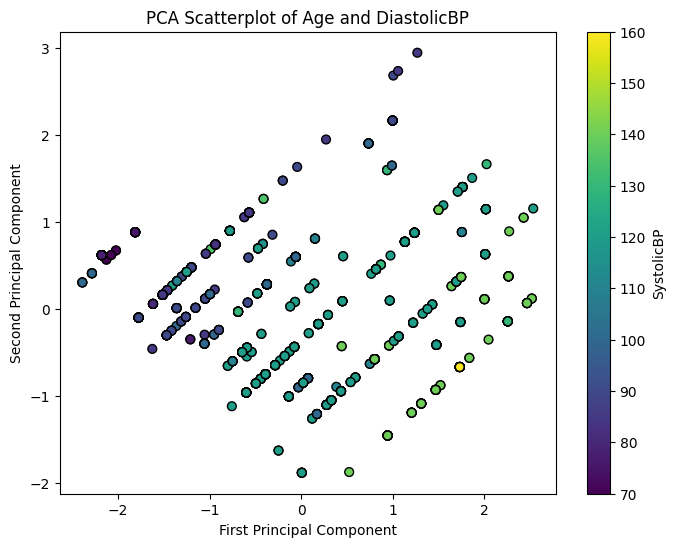

In [ ]:
#PCA TWO VARIABLES - AGE & DIASTOLICBP
X3 = mhs_df[['Age', 'DiastolicBP']]
y = mhs_df['SystolicBP']

# Standardize the feature variables
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

# Apply PCA with n_components = 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X3_scaled)

# Apply PCA
pca3 = PCA()
X3_pca = pca3.fit_transform(X3_scaled)

# Split the data into train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_pca, y, test_size=0.2, random_state=42)

# Fit linear regression model on training data
model3_pca = LinearRegression()
model3_pca.fit(X3_train, y3_train)

# Make predictions on test data after PCA transformation
y3_pred_pca = model3_pca.predict(X3_test)

# Calculate evaluation metrics for PCA model
r2_pca3 = r2_score(y3_test, y3_pred_pca)
mse_pca3 = mean_squared_error(y3_test, y3_pred_pca)
rmse_pca3 = np.sqrt(mse_pca3)
mae_pca3 = mean_absolute_error(y3_test, y3_pred_pca)

print('PCA Model Age and DiastolicBP:')
print('Explained Variance Ratio:', pca3.explained_variance_ratio_)
print('R-squared: ', r2_pca3)
print('Mean Squared Error: ', mse_pca3)
print('Root Mean Squared Error: ', rmse_pca3)
print('Mean Absolute Error: ', mae_pca3)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X3_pca[:, 0], X3_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatterplot of Age and DiastolicBP')
plt.colorbar(label='SystolicBP')
plt.show()


PCA Model with Age, DiastolicBP and Blood Sugar:
Explained Variance Ratio: [0.62139653 0.20395356 0.17464991]
R-squared: 
Mean Squared Error:  123.07905180066932
Root Mean Squared Error:  11.094099864372472
Mean Absolute Error:  8.868417959651817


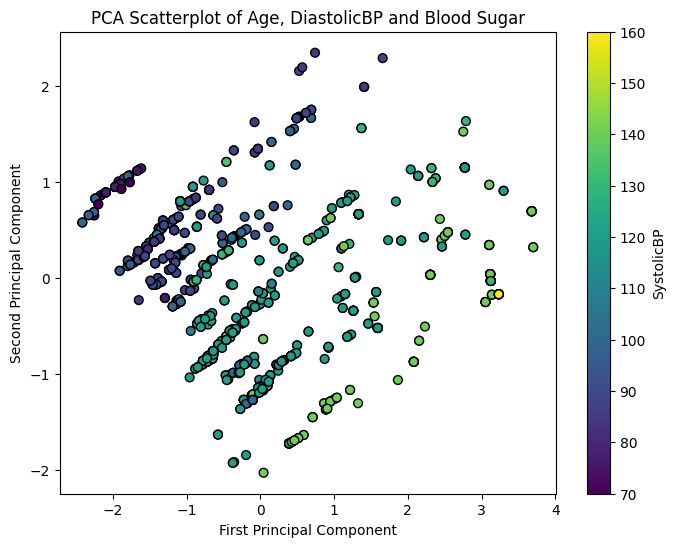

In [ ]:
#PCA THREE VARIABLES - AGE, DIASTOLICBP & BS
X4 = mhs_df[['Age', 'DiastolicBP', 'BS']]
y = mhs_df['SystolicBP']

# Standardize the feature variables
scaler = StandardScaler()
X4_scaled = scaler.fit_transform(X4)

# Apply PCA
pca4 = PCA()
X4_pca = pca4.fit_transform(X4_scaled)

# Split the data into train and test sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4_pca, y, test_size=0.2, random_state=42)

# Fit linear regression model on training data
model4_pca = LinearRegression()
model4_pca.fit(X4_train, y4_train)

# Make predictions on test data after PCA transformation
y4_pred_pca = model4_pca.predict(X4_test)

# Calculate evaluation metrics for PCA model
r2_pca4 = r2_score(y4_test, y4_pred_pca)
mse_pca4 = mean_squared_error(y4_test, y4_pred_pca)
rmse_pca4 = np.sqrt(mse_pca4)
mae_pca4 = mean_absolute_error(y4_test, y4_pred_pca)

print('PCA Model with Age, DiastolicBP and Blood Sugar:')
print('Explained Variance Ratio:', pca4.explained_variance_ratio_)
print('R-squared: ')
print('Mean Squared Error: ', mse_pca4)
print('Root Mean Squared Error: ', rmse_pca4)
print('Mean Absolute Error: ', mae_pca4)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X4_pca[:, 0], X4_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatterplot of Age, DiastolicBP and Blood Sugar')
plt.colorbar(label='SystolicBP')
plt.show()


In [ ]:
# Create a dictionary with model names and their corresponding evaluation metrics
model_scores = {
    'Model': ['PCA Model with All Variables', 'PCA Model with Age and DiastolicBP', 'PCA Model with Age, DiastolicBP and Blood Sugar'],
    #'Explained Variance Ratio': [pca.explained_variance_ratio_.sum(), pca3.explained_variance_ratio_.sum(), pca4.explained_variance_ratio_.sum()],
    'R-squared': [r2_pca, r2_pca3, r2_pca4],
    'Mean Squared Error': [mse_pca, mse_pca3, mse_pca4],
    'Root Mean Squared Error': [rmse_pca, rmse_pca3, rmse_pca4],
    'Mean Absolute Error': [mae_pca, mae_pca3, mae_pca4]
}

# Create a DataFrame using the dictionary
scores_df = pd.DataFrame(model_scores)

# Display the DataFrame
scores_df


,Model,R-squared,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
0,PCA Model with All Variables,0.628877,120.092197,10.958659,8.842660
1,PCA Model with Age and DiastolicBP,0.611199,125.812534,11.216619,8.978062
2,"PCA Model with Age, DiastolicBP and Blood Sugar",0.619647,123.079052,11.094100,8.868418


#### Task 3 - Age and Heartrate by Means of Age Grouping

https://www.statista.com/statistics/281208/population-of-the-england-by-age-group/

In [ ]:
#Age Grouping using 5 years interval

mhs_df['Age Group'] = mhs_df['Age']
mhs_df['Age Group'] = pd.cut(mhs_df['Age'], bins=range(0, 71, 5), labels=['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+'])

age_counts = mhs_df['Age Group'].value_counts()
age_counts

20-24    205
15-19    187
30-34    130
10-14    110
25-29    110
45-49     79
35-39     53
50-54     50
40-44     41
55-59     37
60-64      6
5-9        4
65+        2
0-4        0
Name: Age Group, dtype: int64

In [ ]:
#calculate heart rate mean by age group
age_count_means = mhs_df.groupby('Age Group')['HeartRate'].mean().round(2)
age_count_means

Age Group
0-4        NaN
5-9      70.00
10-14    72.60
15-19    72.81
20-24    73.79
25-29    77.74
30-34    73.42
35-39    78.72
40-44    71.59
45-49    78.99
50-54    72.22
55-59    71.54
60-64    79.67
65+      78.00
Name: HeartRate, dtype: float64

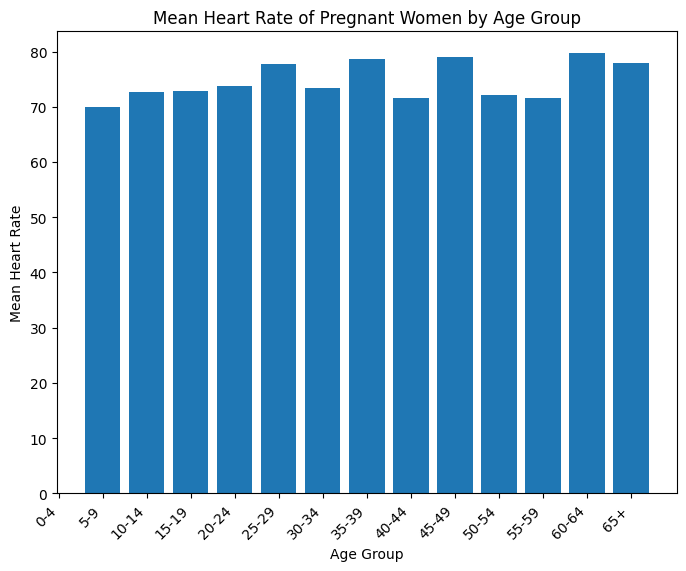

In [ ]:
# create a bar plot with rotated x-axis labels
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(age_count_means.index, age_count_means.values)
ax.set_title('Mean Heart Rate of Pregnant Women by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Mean Heart Rate')

# rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.show()

#### Apriori Algorithm

In [ ]:
import mlxtend

from mlxtend.frequent_patterns import apriori, association_rules

# Define the ranges for high, normal, and low blood pressure
high_sys = mhs_df['SystolicBP'] >= 140
high_dia = mhs_df['DiastolicBP'] >= 90
norm_sys = (mhs_df['SystolicBP'] >= 110) & (mhs_df['SystolicBP'] < 140)
norm_dia = (mhs_df['DiastolicBP'] >= 70) & (mhs_df['DiastolicBP'] < 90)
low_sys = mhs_df['SystolicBP'] < 110
low_dia = mhs_df['DiastolicBP'] < 70

#create a new column for sys and dia status
mhs_df.loc[high_sys, 'systolic_status'] = 'high'
mhs_df.loc[norm_sys, 'systolic_status'] = 'normal'
mhs_df.loc[low_sys, 'systolic_status'] = 'low'

mhs_df.loc[high_dia, 'diastolic_status'] = 'high'
mhs_df.loc[norm_dia, 'diastolic_status'] = 'normal'
mhs_df.loc[low_dia, 'diastolic_status'] = 'low'

# Create a new column to label the blood pressure level of each row

#High_sys

mhs_df.loc[high_sys & high_dia, 'BP_Level'] = 'high/high'
mhs_df.loc[high_sys & norm_dia, 'BP_Level'] = 'high/normal'
mhs_df.loc[high_sys & low_dia, 'BP_Level'] = 'high/low'


#normal_sys
mhs_df.loc[norm_sys & high_dia, 'BP_Level'] = 'normal/high'
mhs_df.loc[norm_sys & norm_dia, 'BP_Level'] = 'normal/normal'
mhs_df.loc[norm_sys & low_dia, 'BP_Level'] = 'normal/low'

#low
mhs_df.loc[low_sys & high_dia, 'BP_Level'] = 'low/high'
mhs_df.loc[low_sys & norm_dia, 'BP_Level'] = 'low/normal'
mhs_df.loc[low_sys & low_dia, 'BP_Level'] = 'low/low'


mhs_df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age Group,systolic_status,diastolic_status,BP_Level
0,25,130,80,15.0,98.0,86,0,20-24,normal,normal,normal/normal
1,35,140,90,13.0,98.0,70,0,30-34,high,high,high/high
2,29,90,70,8.0,100.0,80,0,25-29,low,normal,low/normal
3,30,140,85,7.0,98.0,70,0,25-29,high,normal,high/normal
4,35,120,60,6.1,98.0,76,1,30-34,normal,low,normal/low


In [ ]:
#apply one hot encoding 
from mlxtend.frequent_patterns import apriori, association_rules

one_hot = pd.get_dummies(mhs_df[['systolic_status','diastolic_status']])

one_hot

,systolic_status_high,systolic_status_low,systolic_status_normal,diastolic_status_high,diastolic_status_low,diastolic_status_normal
0,0,0,1,0,0,1
1,1,0,0,1,0,0
2,0,1,0,0,0,1
3,1,0,0,0,0,1
4,0,0,1,0,1,0
...,...,...,...,...,...,...
1009,0,0,1,0,1,0
1010,0,0,1,1,0,0
1011,0,1,0,0,1,0
1012,0,0,1,1,0,0


In [ ]:
# Calculate the frequent itemsets with minimum support of 0.1
frequent_itemsets = apriori(one_hot, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.128205,(systolic_status_high)
1,0.339250,(systolic_status_low)
2,0.532544,(systolic_status_normal)
3,0.272189,(diastolic_status_high)
4,0.316568,(diastolic_status_low)
5,0.411243,(diastolic_status_normal)
6,0.115385,"(systolic_status_high, diastolic_status_high)"
7,0.266272,"(systolic_status_low, diastolic_status_low)"
8,0.146943,"(systolic_status_normal, diastolic_status_high)"
9,0.335306,"(systolic_status_normal, diastolic_status_normal)"


In [ ]:
# Filter the frequent itemsets for high diastolic and systolic status, and normal diastolic and systolic status
filtered_itemsets = frequent_itemsets[(frequent_itemsets['itemsets'] == {'systolic_status_high', 'diastolic_status_high'}) |
                                      (frequent_itemsets['itemsets'] == {'systolic_status_normal', 'diastolic_status_normal'}) |
                                     (frequent_itemsets['itemsets'] == {'systolic_status_low', 'diastolic_status_low'})]

# Print the filtered frequent itemsets
print(filtered_itemsets)

    support                                           itemsets
6  0.115385      (systolic_status_high, diastolic_status_high)
7  0.266272        (systolic_status_low, diastolic_status_low)
9  0.335306  (systolic_status_normal, diastolic_status_normal)


In [ ]:
# Calculate the association rules with minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(systolic_status_high),(diastolic_status_high),0.128205,0.272189,0.115385,0.900000,3.306522,0.080489,7.278107
1,(diastolic_status_high),(systolic_status_high),0.272189,0.128205,0.115385,0.423913,3.306522,0.080489,1.513304
2,(systolic_status_low),(diastolic_status_low),0.339250,0.316568,0.266272,0.784884,2.479352,0.158876,3.177035
3,(diastolic_status_low),(systolic_status_low),0.316568,0.339250,0.266272,0.841121,2.479352,0.158876,4.158835
4,(diastolic_status_high),(systolic_status_normal),0.272189,0.532544,0.146943,0.539855,1.013728,0.001990,1.015888
5,(systolic_status_normal),(diastolic_status_normal),0.532544,0.411243,0.335306,0.629630,1.531042,0.116301,1.589645
6,(diastolic_status_normal),(systolic_status_normal),0.411243,0.532544,0.335306,0.815348,1.531042,0.116301,2.531545


In [ ]:
# calculate support, confidence, conviction, and lift for each association rule
rules['support'] = rules['support'].round(3)
rules['confidence'] = rules['confidence'].round(3)
rules['conviction'] = rules['conviction'].round(3)
rules['lift'] = rules['lift'].round(3)

# print the association rules and their metrics
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(systolic_status_high),(diastolic_status_high),0.128205,0.272189,0.115,0.900,3.307,0.080489,7.278
1,(diastolic_status_high),(systolic_status_high),0.272189,0.128205,0.115,0.424,3.307,0.080489,1.513
2,(systolic_status_low),(diastolic_status_low),0.339250,0.316568,0.266,0.785,2.479,0.158876,3.177
3,(diastolic_status_low),(systolic_status_low),0.316568,0.339250,0.266,0.841,2.479,0.158876,4.159
4,(diastolic_status_high),(systolic_status_normal),0.272189,0.532544,0.147,0.540,1.014,0.001990,1.016
5,(systolic_status_normal),(diastolic_status_normal),0.532544,0.411243,0.335,0.630,1.531,0.116301,1.590
6,(diastolic_status_normal),(systolic_status_normal),0.411243,0.532544,0.335,0.815,1.531,0.116301,2.532


In [ ]:
# Filter the association rules for diastolic_status_high and systolic_status_high
rules_high = rules[(rules['antecedents'] == {'diastolic_status_high'}) & (rules['consequents'] == {'systolic_status_high'})]

# Filter the association rules for diastolic_status_normal and systolic_status_normal
rules_normal = rules[(rules['antecedents'] == {'diastolic_status_normal'}) & (rules['consequents'] == {'systolic_status_normal'})]

# Filter the association rules for diastolic_status_normal and systolic_status_normal
rules_low = rules[(rules['antecedents'] == {'diastolic_status_low'}) & (rules['consequents'] == {'systolic_status_low'})]


# Concatenate the two filtered rules
filtered_rules = pd.concat([rules_high, rules_normal, rules_low])

# Print the filtered rules
#print(filtered_rules)
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(diastolic_status_high),(systolic_status_high),0.272189,0.128205,0.115,0.424,3.307,0.080489,1.513
6,(diastolic_status_normal),(systolic_status_normal),0.411243,0.532544,0.335,0.815,1.531,0.116301,2.532
3,(diastolic_status_low),(systolic_status_low),0.316568,0.339250,0.266,0.841,2.479,0.158876,4.159


#### Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

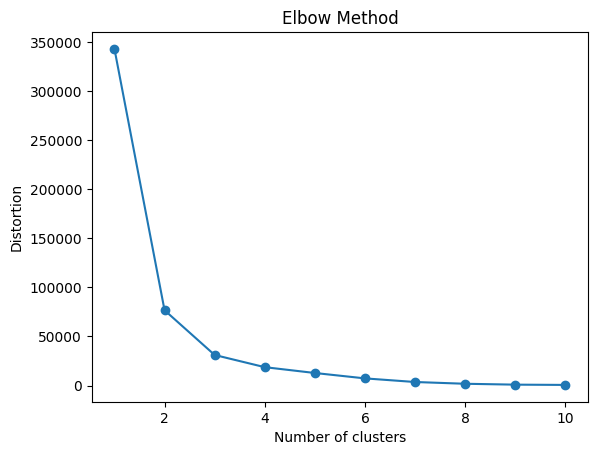

Cluster
0    141.390977
1     90.578488
2    120.705773
Name: SystolicBP, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Extract the SystolicBP column from the dataframe
X = mhs_df['SystolicBP'].values.reshape(-1, 1)

# Determine the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the dataframe
mhs_df['Cluster'] = y_kmeans

# Display the mean SystolicBP for each cluster
print(mhs_df.groupby('Cluster')['SystolicBP'].mean())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette score is: 0.801701598605281


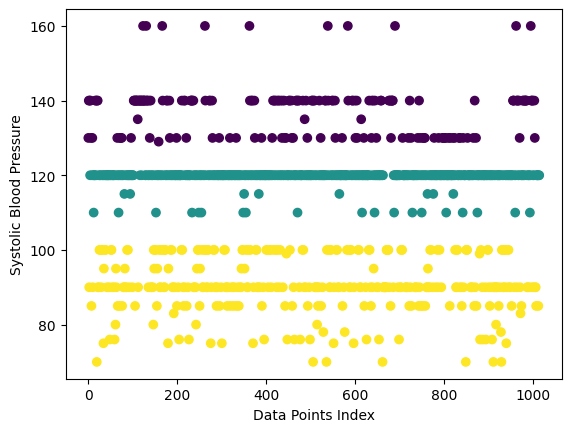

In [ ]:
data = mhs_df['SystolicBP'].values.reshape(-1, 1)

# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

# Calculate the silhouette score
silhouette_avg = silhouette_score(data, kmeans.labels_)

# Print the silhouette score
print("The average silhouette score is:", silhouette_avg)

# Visualize the clusters
plt.scatter(range(len(data)), data, c=kmeans.labels_)

# Set the x-axis and y-axis labels
plt.xlabel('Data Points Index')
plt.ylabel('Systolic Blood Pressure')

plt.show()


The average silhouette score is a measure of how well each data point fits into its assigned cluster compared to other clusters. The score ranges from -1 to 1, with 1 indicating that the point is very well matched to its cluster and poorly matched to neighboring clusters.

In this case, the average silhouette score is 0.8017, which is close to 1 and indicates that the clusters are well separated and the data points within each cluster are tightly grouped together. This suggests that the clustering algorithm has done a good job of grouping similar data points together based on their Systolic BP values.

##### Age and SystolicBP

In [ ]:
#calculate correlation between age and systolicBP
round(mhs_df['Age'].corr(mhs_df['SystolicBP']),5)

0.41605

The correlation result of 0.41604544797473325 indicates a moderately positive correlation between Age and SystolicBP in the mhs_df dataset.

A correlation coefficient is a statistical measure that describes the strength and direction of a relationship between two variables. In this case, the positive value of 0.41604544797473325 indicates that as Age increases, SystolicBP tends to increase as well, but not to a very high degree.

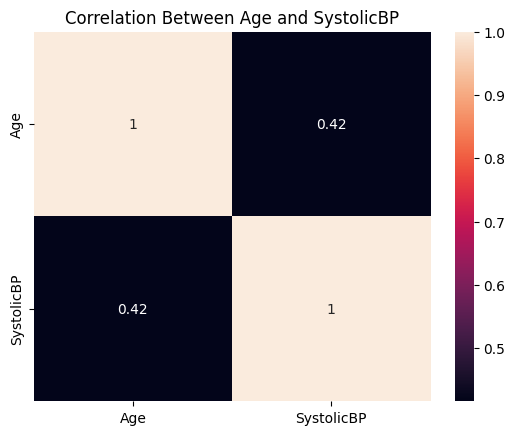

In [ ]:
# Calculate correlation matrix
corr_matrix = mhs_df[['Age', 'SystolicBP']].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True) 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Between Age and SystolicBP')
plt.show()